In [10]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 14 16:17:08 2022

@author: Jelle
"""
import numpy as np
import scipy.spatial as spatial
import matplotlib.pyplot as plt


In [11]:
# Test Calculating distances from every particle i to j
N = 1000
L = 30  # boxize in Angstrom
x = np.random.rand(N, 3)*L  # particle positions

In [12]:
def allDistances1(x):
    N, D = x.shape
    d = np.zeros((N, N))

    for i in range(N):
        pos_ix = x[i, 0]
        pos_iy = x[i, 1]
        pos_iz = x[i, 2]
        
        for j in range(N):
            pos_jx = x[j, 0]
            pos_jy = x[j, 1]
            pos_jz = x[j, 2]
            
            dx = pos_jx - pos_ix
            dy = pos_jy - pos_iy
            dz = pos_jz - pos_iz
            
            d[i, j] = np.sqrt(dx**2 + dy**2 + dz**2)
    return d  # the squared distances that are returned

In [13]:
%timeit allDistances1(x)

a = allDistances1(x)

1.97 s ± 40.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
def allDistances2(x):
    N, D = x.shape
    d_sq = np.zeros((N, N))

    for i in range(N):
        pos_i = x[i, :]
        
        for j in range(i+1, N):
            pos_j = x[j, :]
            
            d = pos_j - pos_i
            
            d_sq[i, j] = d[0]**2 + d[1]**2 + d[2]**2
    return d_sq  # the squared distances that are returnedhe squared distances that are returned

In [15]:
%timeit allDistances2(x)

b = np.sqrt(allDistances2(x))

736 ms ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
a == b

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

False

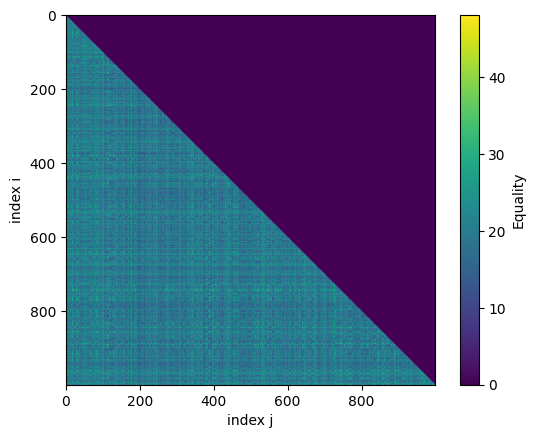

In [17]:
plt.imshow(a-b)
plt.colorbar(label="Equality")
plt.xlabel("index j")
plt.ylabel("index i")

np.allclose(a, b)

In [18]:
def allDistances3(x):
    N, D = x.shape
    d_sq = np.zeros((N, N))
    
    for (i, pos_i) in enumerate(x):  # loop over all rows of 2D array X
        d = x - pos_i  # subtrack pos_i immidiately of all items.
        d_sq[i, :] = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2

    return d_sq  # the squared distances that are returned

In [19]:
%timeit allDistances3(x)

20 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


True

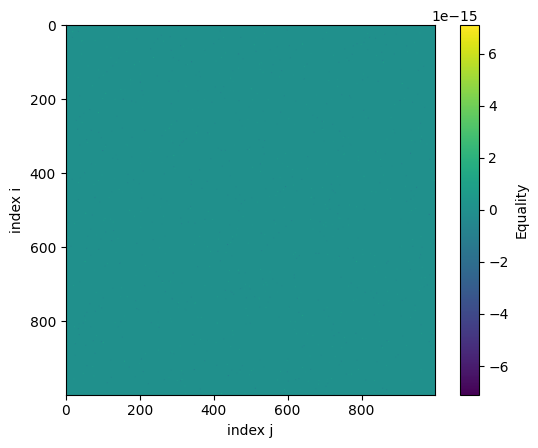

In [20]:
c = np.sqrt(allDistances3(x))
plt.imshow(a-c)
plt.colorbar(label="Equality")
plt.xlabel("index j")
plt.ylabel("index i")

np.allclose(a, c)

In [21]:
def allDistances4(x, interactions):
    d = x[interactions[1], :] - x[interactions[0], :]
    d_sq = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2
    return d_sq  # the squared distances that are returned

In [22]:
# Setup an interactions array first
interactions = np.triu_indices(x.shape[0], k=1)
z = interactions[0]
y = interactions[1]

%timeit allDistances4(x, interactions)

48.3 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


False

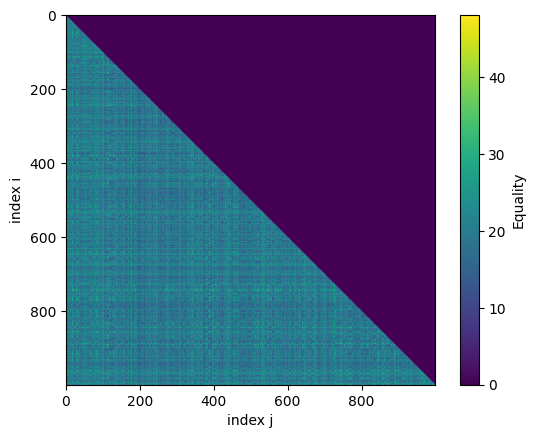

In [23]:
d = np.zeros((x.shape[0], x.shape[0]))
d[interactions] = np.sqrt(allDistances4(x, interactions))

plt.imshow(a-d)
plt.colorbar(label="Equality")
plt.xlabel("index j")
plt.ylabel("index i")

np.allclose(a, d)

In [24]:
def allDistances5(x):
    N, D = x.shape

    # Computed distances via an optics interactions trick in an addtional dimension
    r = np.broadcast_to(x, (N, N, D))
    rel_r = r - r.transpose(1, 0, 2)
    d_sq = np.einsum('ijk, ijk->ij',
                     rel_r, rel_r,
                     optimize='optimal')
    return d_sq  # the squared distances that are returned

In [25]:
%timeit allDistances5(x)

35.2 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


7.105427357601002e-15

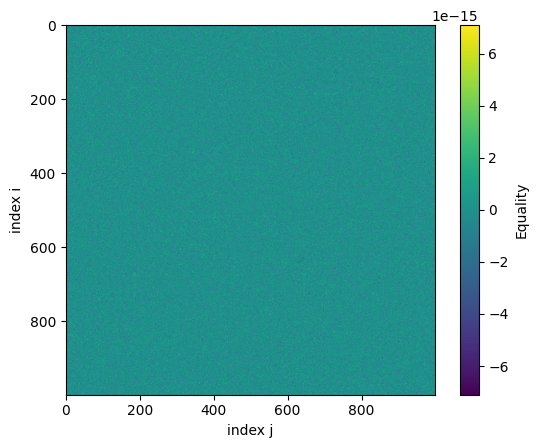

In [26]:
e = np.sqrt(allDistances5(x))

plt.imshow(a-e)
plt.colorbar(label="Equality")
plt.xlabel("index j")
plt.ylabel("index i")

np.allclose(a, e)
np.max(a-e)

In [27]:
def allDistances6(x):
    # Use the scipy.spation package
    r = spatial.distance_matrix(x, x)
    return r

In [28]:
%timeit allDistances6(x)

59.4 ms ± 6.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


7.105427357601002e-15

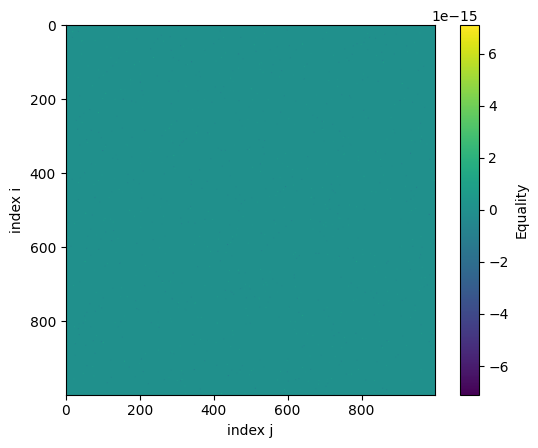

In [29]:
f = allDistances6(x)

plt.imshow(a-f)
plt.colorbar(label="Equality")
plt.xlabel("index j")
plt.ylabel("index i")

np.allclose(a, f)
np.max(a-f)